
# Pipelines


---

## Learning Objectives
By the end of this lesson students will:

- Understand the value of pipelines
- Use scikit-learn's `Pipeline` function to create a pipeline object
- Fit, predict, and score sklearn pipeline objects


### Prior knowledge required
- Python basics
- pandas baics
- Understand the machine learning workflow with scikit-learn

---

## Pipelines

### With a pipeline we can chain transformers together before ending in an estimator.

![](./images/pipe.png)

### Using pipelines is a best practice but they can be frustrating

They are reusable and help us avoid a fundamental machine learning no-no: information from the test-set sneaking into model training. It can be tricky to get back information about our features.

You don't have to use pipelines - you can always just do each transformation individually! 


#### Imports

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

We're looking at the Diamonds dataset. `price` is what we want to predict. Data dictionary [here](https://ggplot2.tidyverse.org/reference/diamonds.html).

#### Read in the data

In [2]:
diamonds = pd.read_csv('./data/diamonds.csv')

#### Inspect 

In [3]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Break into X and y

Just use `carat` and `depth` for now.

In [4]:
X = diamonds[['carat', 'depth']]
y = diamonds['price']

In [5]:
X.shape

(53940, 2)

In [6]:
y.shape

(53940,)

#### Use TTS to create a holdout/test set and the remaining data for training

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [8]:
X_train[:2]

,carat,depth
19351,0.31,61.8
16886,1.26,59.6


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13485 entries, 20631 to 5162
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   13485 non-null  float64
 1   depth   13485 non-null  float64
dtypes: float64(2)
memory usage: 316.1 KB


In [12]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 13485 entries, 20631 to 5162
Series name: price
Non-Null Count  Dtype
--------------  -----
13485 non-null  int64
dtypes: int64(1)
memory usage: 210.7 KB


In [9]:
y_train[:2]

19351     622
16886    6738
Name: price, dtype: int64

## Make a pipeline with `Pipeline`

In [20]:
from sklearn.pipeline import Pipeline

In [14]:
Pipeline()

TypeError: Pipeline.__init__() missing 1 required positional argument: 'steps'

#### What does `Pipeline` take?

In [ ]:
#takes a list of tuples (name, transformer)

#### What does it return? 

#### Want to see the pipeline object graphically?

In [15]:
import sklearn
sklearn.set_config(display='diagram')  

#### Want the text instead? Pass # display=text

#### You could instantiate a `Pipeline` object by hand, but `make_pipeline` is faster and more convenient. I suggest using it pretty much always. 🙂

### Fit the pipeline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [17]:
pipe = Pipeline([('scale', StandardScaler()),
                ('model', Ridge())])

# ⚠️ With a pipeline, `fit()` fits and transforms! ⚠️

No need to use `fit_transform` or `transform`, as you would with a stand-alone transformer! 👍

Predictioning and scoring work the same as with a regular scikit-learn estimator.

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', Ridge())])

In [19]:
pipe.score(X_train, y_train)

0.8490460897233938

In [20]:
pipe.score(X_test, y_test)

0.8554864329080052

In [21]:
yhat_train = pipe.predict(X_train)

In [22]:
print(yhat_train)

[ 1.44329412e+02  7.72691179e+03  1.68994569e+03 ... -2.12560143e+02
  7.40050461e+02  5.97563397e+00]


#### Pull information out of the pipeline

Let's get the coefficients.

In [23]:
pipe.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [24]:
pipe.steps

[('scale', StandardScaler()), ('model', Ridge())]

In [25]:
pipe.named_steps

{'scale': StandardScaler(), 'model': Ridge()}

In [26]:
pipe.named_steps['model']

Ridge()

In [27]:
pipe.named_steps['model'].coef_

array([3672.50384183, -145.61248081])

Interpret the coefficients.

In [25]:
X.head(2)

,carat,depth
0,0.23,61.5
1,0.21,59.8


---
## Exercise: Make a pipeline with the columns **carat, depth, table** with the following steps:

- Use PolynomialFeatures to make more features.
- Then StandardScaler to scale the data.
- Then RFE to cut the number of features in half.
- Then Lasso with the default alpha value for the estimator.

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, FunctionTransformer
from sklearn.feature_selection import RFE

In [42]:
def extract_data(X):
    return X.loc[:,["carat", "depth", "table"]], X["price"]
X, Y = extract_data(diamonds)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=22)

In [41]:
#p1 = Pipeline([
#    ('extract', FunctionTransformer(extract_data)),
#    ('polynomial', PolynomialFeatures(degree=2)),
#    ('scaler', StandardScaler()),
#    ('rfe', RFE(Lasso())),
#    ('lasso', Lasso())
#])

In [46]:
p1 = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('rfe', RFE(Lasso(max_iter = 10000))),
    ('lasso', Lasso(max_iter = 10000))
])

In [47]:
p1.fit(X_train, y_train)

/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.107e+07, tolerance: 6.421e+07
  model = cd_fast.enet_coordinate_descent(
/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.107e+07, tolerance: 6.421e+07
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('scaler', StandardScaler()),
                ('rfe', RFE(estimator=Lasso(max_iter=10000))),
                ('lasso', Lasso(max_iter=10000))])

In [56]:
p1.score(X_train, y_train)

0.8546543495088028

In [57]:
p1.score(X_test, y_test)

0.8608312166051424

In [64]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

In [49]:
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [51]:
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('scaler', StandardScaler()),
                 ('rfe', RFE(Lasso(alpha = 10, max_iter = 1000))),
                 ('model', Lasso(alpha = 100, max_iter=10000))])

In [52]:
pipe2.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('rfe', RFE(estimator=Lasso(alpha=10))),
                ('model', Lasso(alpha=100, max_iter=10000))])

In [53]:
pipe2.score(X_train, y_train)

0.8510000534097533

In [54]:
pipe2.score(X_test, y_test)

0.8585000813115671

#### Fit and score

In [58]:
rfe = pipe2.named_steps['rfe']

In [59]:
rfe.get_feature_names_out()

array(['x1', 'x4', 'x7', 'x8', 'x9'], dtype=object)

In [52]:
pipe2.named_steps['poly'].get_feature_names_out()

array(['1', 'carat', 'depth', 'table', 'carat^2', 'carat depth',
       'carat table', 'depth^2', 'depth table', 'table^2'], dtype=object)

#### How did the results compare to our previous results?

#### Get the the RMSE for the test set

In [60]:
yhat_train = pipe2.predict(X_train)

In [39]:
from sklearn.metrics import mean_squared_error
import math

In [81]:
train_rmse = math.sqrt(mean_squared_error(y_train, yhat_train))
train_rmse

1537.8258852481365

In [87]:
test_rmse = math.sqrt(mean_squared_error(y_test, pipe2.predict(X_test)))
test_rmse

1506.7965893508117

<Axes: >

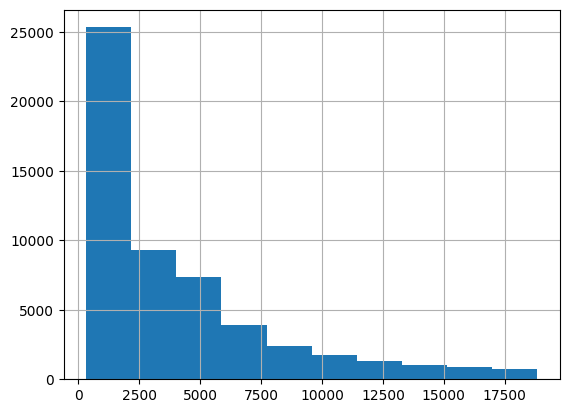

In [66]:
y.hist()

In [67]:
y.mean()

3932.799721913237

In [68]:
import matplotlib.pyplot as plt

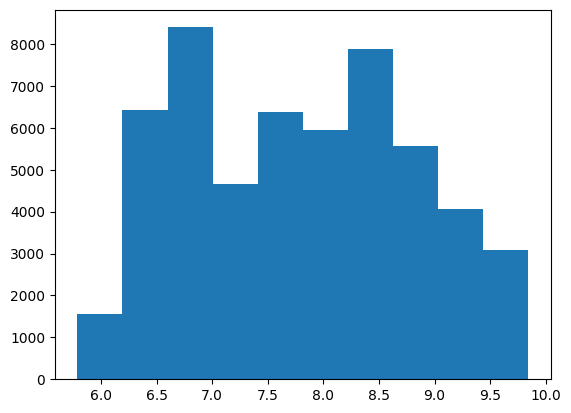

In [69]:
plt.hist(np.log(y));

#### How does a null model perform in terms of RMSE?

In [86]:
mean_y_test = y_test.mean()
y_null = [mean_y_test for i in y_test]
math.sqrt(mean_squared_error(y_test, y_null))

4005.682594577953

#### Is your model any good?

####  Inspect the coefficients for each of the final features. 
We have to dig into the *named_steps*. This is tricky.

In [88]:
pipe2.named_steps

{'poly': PolynomialFeatures(),
 'scaler': StandardScaler(),
 'rfe': RFE(estimator=Lasso(alpha=10)),
 'model': Lasso(alpha=100, max_iter=10000)}

In [91]:
pipe2.named_steps['model'].coef_

array([3249.55542907,  360.10726476,  -12.49076772, -116.55335151,
         -0.        ])

---

## Let's look at more complicated pipelines with a dataset of motorcycle sales. 🏍

In [4]:
mdf = pd.read_csv('./data/motorcylces_smaller.csv')
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1061 non-null   object
 1   selling_price  1061 non-null   int64 
 2   year           1061 non-null   int64 
 3   seller_type    1061 non-null   object
 4   owner          1061 non-null   object
 5   km_driven      1061 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 49.9+ KB


In [5]:
mdf.head(10)

,name,selling_price,year,seller_type,owner,km_driven
0,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000
1,Suzuki GSX S750,760000,2019,Individual,1st owner,2800
2,Kawasaki Ninja 650 [2018-2019],425000,2017,Individual,2nd owner,13600
3,Kawasaki Ninja 650 [2018-2019],300000,2011,Individual,1st owner,12000
4,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500
5,Kawasaki Ninja 300,300000,2016,Individual,1st owner,9800
6,Yamaha YZF R3,365000,2019,Individual,1st owner,1127
7,BMW G310GS,300000,2018,Individual,1st owner,2500
8,Hyosung GT250R,135000,2016,Individual,2nd owner,16500
9,Kawasaki Ninja 250R,125000,2010,Individual,2nd owner,21000


In [8]:
mdf["owner"].describe()

count          1061
unique            4
top       1st owner
freq            924
Name: owner, dtype: object

In [9]:
mdf.isna().sum()

name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64

### Making some missing data
You wouldn't normally make missing data unless testing something. We are doing this so we can practice with filling missing values.

In [10]:
mdf.loc[mdf.sample(frac=0.1).index, 'year'] = np.nan
mdf.loc[mdf.sample(frac=0.05).index, 'owner'] = np.nan

In [11]:
mdf.isna().sum()

name               0
selling_price      0
year             106
seller_type        0
owner             53
km_driven          0
dtype: int64

## General modeling tip: Start with a simple model. 👍

Get a win under your belt. 
- Choosing numeric columns makes this easier. 
- Make X the *km_driven* and _year_ columns only. 
- Make y. 
- Train-test split. 

In [12]:
X = mdf[['km_driven', 'year']]
y = mdf['selling_price']

In [13]:
X.isna().sum()

km_driven      0
year         106
dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head(2)

,km_driven,year
676,20000,2010.0
403,14000,2018.0


In [15]:
X_train.shape

(795, 2)

In [16]:
X_test.shape

(266, 2)

### Make a pipeline
- fill missing values with the mode using SimpleImputer
- scale with StandardScaler
- use Ridge regression to make predictions

In [17]:
from sklearn.impute import SimpleImputer

In [21]:
pipe3 = Pipeline([
    ("imputer", SimpleImputer()),
    ("scale", StandardScaler()),
    ("model", Ridge())
])

In [22]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scale', StandardScaler()),
                ('model', Ridge())])

In [23]:
train_predictions = pipe3.predict(X_train)

In [24]:
test_predictions = pipe3.predict(X_test)

In [25]:
pd.DataFrame(SimpleImputer().fit_transform(X_train)).isna().sum()

0    0
1    0
dtype: int64

### Now let's try a model with more columns - add in_seller type_ and _owner_ .

In [26]:
mdf.head(2)

,name,selling_price,year,seller_type,owner,km_driven
0,Harley-Davidson Street Bob,750000,2013.0,Individual,2nd owner,12000
1,Suzuki GSX S750,760000,2019.0,Individual,1st owner,2800


In [27]:
X = mdf.drop(columns=['name', 'selling_price'])
y = mdf['selling_price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## `make_column_transformer` 
### Use different transformations on different columns  🎉

To use different transformations on different columns, use `make_column_transformer`.

`make_column_transformer` is a convenience function to make a `ColumnTransformer` object, similar to how `make_pipeline` is a convenience method to make a `Pipeline` object.



Make a column transformer object to fill missing values in *year* with the mean  and missing values in *seller_type* with the mode.

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

set_config(transform_output="pandas")

In [30]:
col_transformer = ColumnTransformer([("rest", "passthrough", ["owner", "km_driven"]), ("year", SimpleImputer(strategy="mean"), ["year"]), ("seller", SimpleImputer(strategy="most_frequent"), ["seller_type"])])

#### Use this ColumnTransformer object in a pipeline. 

First, impute, then encode, then scale, then model with Ridge

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(mdf.loc[:,["year", "km_driven", "owner", "seller_type"]], mdf.loc[:,"selling_price"])

In [57]:
X_train.shape

(795, 4)

In [58]:
X_test.shape

(266, 4)

In [151]:

cat = [0, 3]
numeric = [2, 1]

def debug(X):
    print("hi")
    print(pd.DataFrame(X))
    return pd.DataFrame(X)

pipe4 = Pipeline([
    ("imputer", col_transformer),
    ("encoder", ColumnTransformer(transformers = [("numeric", PolynomialFeatures(degree=6), numeric), ("categorical", OneHotEncoder(drop="first", sparse_output=False), cat)])),
    ("scaler", StandardScaler()),
    ("debug", FunctionTransformer(debug)),
    ("model", Ridge(alpha=10.481131341546858))
])

In [148]:
params = {"encoder__numeric__degree":[1, 2, 3, 4, 5, 6], "model__alpha":np.logspace(0, 5)}
grd = GridSearchCV(estimator = pipe4, param_grid = params)

In [149]:
grd.fit(X_train, Y_train)

ValueError: 
All the 1500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 1001, in fit_transform
    result = self._call_func_on_transformers(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 910, in _call_func_on_transformers
    return Parallel(n_jobs=self.n_jobs)(jobs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 77, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/joblib/parallel.py", line 1985, in __call__
    return output if self.return_generator else list(output)
                                                ^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/joblib/parallel.py", line 1913, in _get_sequential_output
    res = func(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/parallel.py", line 139, in __call__
    return self.function(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/sangeetsatpathy/.pyenv/versions/3.11.1/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py", line 1027, in transform
    raise ValueError(
ValueError: Pandas output does not support sparse data. Set sparse_output=False to output pandas dataframes or disable Pandas output via` ohe.set_output(transform="default").


In [140]:
grd.best_params_

{'encoder__numeric__degree': 6, 'model__alpha': 10.481131341546858}

In [152]:
pipe4.fit(X_train, Y_train)

hi
     numeric__1  numeric__year__year  numeric__rest__km_driven  \
407         0.0            -1.392390                  0.528486   
317         0.0            -0.667152                  0.050669   
547         0.0             1.266816                 -0.542931   
840         0.0             0.783324                  0.079182   
346         0.0             0.299832                 -0.565396   
..          ...                  ...                       ...   
733         0.0            -2.117628                  0.251992   
565         0.0            -0.425406                  0.079182   
388         0.0             1.025070                 -0.300998   
127         0.0             1.266816                 -0.556756   
130         0.0             0.000000                  0.632172   

     numeric__year__year^2  numeric__year__year rest__km_driven  \
407              -1.393559                             0.527193   
317              -0.668746                             0.050452   
547

Pipeline(steps=[('imputer',
                 ColumnTransformer(transformers=[('rest', 'passthrough',
                                                  ['owner', 'km_driven']),
                                                 ('year', SimpleImputer(),
                                                  ['year']),
                                                 ('seller',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['seller_type'])])),
                ('encoder',
                 ColumnTransformer(transformers=[('numeric',
                                                  PolynomialFeatures(degree=6),
                                                  [2, 1]),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 3])])),
                ('scaler', StandardScaler()),
                ('debug',
                 FunctionTransformer(func=<function debug at 0x324681300>)),
                ('model', Ridge(alpha=10.481131341546858))])

In [153]:
train_predict = pipe4.predict(X_train)
test_predict = pipe4.predict(X_test)

hi
     numeric__1  numeric__year__year  numeric__rest__km_driven  \
407         0.0            -1.392390                  0.528486   
317         0.0            -0.667152                  0.050669   
547         0.0             1.266816                 -0.542931   
840         0.0             0.783324                  0.079182   
346         0.0             0.299832                 -0.565396   
..          ...                  ...                       ...   
733         0.0            -2.117628                  0.251992   
565         0.0            -0.425406                  0.079182   
388         0.0             1.025070                 -0.300998   
127         0.0             1.266816                 -0.556756   
130         0.0             0.000000                  0.632172   

     numeric__year__year^2  numeric__year__year rest__km_driven  \
407              -1.393559                             0.527193   
317              -0.668746                             0.050452   
547

In [144]:
math.sqrt(mean_squared_error(Y_train, train_predict))

51051.97649422462

In [145]:
math.sqrt(mean_squared_error(Y_test, test_predict))

46374.53395758335

#### How did our model do?

### How many features does our final model have?

In [123]:
rr_scaled = pipe4.named_steps["model"]

In [154]:
pipe4.named_steps["model"].coef_

array([    0.        ,  -421.94845228, -6736.94860831,   943.42887342,
       -7049.28283518, 14642.63721868,  2306.61165057, -7361.04791614,
       14755.67124385, -5120.75230726,  3667.58645157, -7672.23713214,
       14869.00962519, -5066.79684562, -5925.27039656,  5026.34017363,
       -7982.84386908, 14982.65202007, -5012.64381895, -5902.70063547,
       -1469.97572061,  6382.86003517, -8292.86161735, 15096.59810057,
       -4958.29351248, -5880.08577804, -1458.63052447,  3074.18222427,
        4955.37105869,  1114.40352229,  1364.67395091,  -199.71679281,
        -275.81631901])

#### What can we do to fix our problem?

How's that model? Which one should we use?

---
## Exercise

Predict a country's life expectancy from the GapMinder dataset. Ignore that there might be a time series component.

- Read in the data
- Inspect
- Create X and y - use ['continent', 'year', 'pop', 'gdpPercap'] as your features
- train_test_split

The make a pipeline that does the following:
- fills missing data (if needed)
- one-hot encodes data where appropriate
- standardizes/scales (because using regularization)
- uses polynomial features
- uses recursive feature elimination after creating more columns with polynomial features
- fits a Ridge model

Score your model on the test set

How does your model do in terms of RMSE and R-squared?
How does a null model do?

In [ ]:
# uncomment and run to install if needed
# pip install plotly 

In [ ]:
import plotly.express as px

In [ ]:
gapminder = px.data.gapminder() 

In [ ]:
gapminder.info()

In [ ]:
X = gapminder[['continent', 'year', 'pop', 'gdpPercap']]
y = gapminder['lifeExp']

In [ ]:
m

#### How does a null model perform?

### Challenge: Examine the coefficients. 
#### See if you can figure out which feature has which coefficient.

#### See what columns existed after one-hot encoding

#### See what columns existed after polynomial features

#### See what columns existed after RFE

#### Match coefficients to features

In [ ]:
# How to do this?


## Interpret our standardized coefficients

Which features were most important to our model? We can compare the coefs directly here because we standardized our features with StandardScaler. 

Note that after standard scaling coefficient interpretation changes. 

It's no longer:
- _"a one unit change in X is associated with a ___ change in y"_ 

it's now:

- _"a one standard deviation change in X is associated with a ___ change in y"_

Where __ is the beta coefficient for the feature.

---
## Summary

You saw how to make a pipeline with `make_pipeline`. 

You also learned how to use `make_column_transformer` to apply transformations to only the columns you want.

You'll soon see how to try out lots of hyperparameters by combining GridSearchCV and a pipeline.

The steps once you have your data split:

- instantiate
- fit                   
- predict and/or score

No explicit _transform_ needed! 👍

### Check for Understanding

- Why are pipelines helpful?
- What function do you use to make a pipeline object in scikit learn?
- Does the order of the transformers and estimator you pass it matter?
- How do you access a part of the pipeline?
